In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from viz_utils import *
from dataloaders import *

In [10]:
experiments, meta = load_results(base_dir="results/", dataset="IMDB", model="JWA")
df_tr, df_agr, df_crt_train, df_crt_test = results_to_df(experiments, meta, mode="last")

In [26]:
df_attr = extract_attribution(experiments[0]["attributions"], 0)

In [27]:
df_attr

deeplift  \
experiment example                                                      
0          0        [1.6070826e-05, 3.5414556e-05, 4.420885e-05, 4...   
           1        [1.3828117e-05, 4.2704945e-05, 4.4117907e-05, ...   
           2        [5.443145e-05, 1.0994971e-05, 1.0221986e-05, 0...   
           3        [5.321919e-06, 1.1197156e-05, 9.959771e-05, 7....   
           4        [0.00025153594, 4.321625e-05, 1.8285773e-05, 3...   
...                                                               ...   
           4358     [0.000857179, 1.3054276e-05, 7.285989e-05, 0.0...   
           4359     [3.9246411, 0.62079155, 0.08414239, 0.00888101...   
           4360     [9.9089e-05, 0.11543733, 0.013411274, 0.010731...   
           4361     [3.2875956e-05, 2.9177123e-05, 0.00045706762, ...   
           4362     [0.077340506, 0.19983292, 0.22017032, 5.715200...   

                                                            grad-shap  \
experiment example                                                      
0          0        [0.0020555975, 0.0038074013, 0.0032532178, 0.0...   
           1        [0.00046030257, 0.00027724914, 0.0010608793, 0...   
           2        [0.002282795, 0.0038802337, 0.0017315081, 0.00...   
           3        [0.0041264184, 0.004313578, 0.005248829, 0.002...   
           4        [0.00298641, 0.0012465916, 0.0003098169, 0.001...   
...                                                               ...   
           4358     [0.004102624, 0.00014577113, 8.78725e-05, 0.00...   
           4359     [5.9497385, 1.1577437, 0.111434266, 0.01423796...   
           4360     [0.01626081, 0.04207389, 0.0100342585, 0.00531...   
           4361     [0.015235113, 0.016407927, 0.029489646, 0.0409...   
           4362     [0.19989896, 0.5044709, 0.27115017, 10.643522,...   

                                                             int-grad  
experiment example                                                     
0          0        [0.0019403790238578895, 0.004153642322710836, ...  
           1        [0.0010660513283637552, 0.002861788903464022, ...  
           2        [0.0014023238802764485, 0.0007885600964316734,...  
           3        [0.0010256362543375498, 0.005582064135080312, ...  
           4        [0.009506242878916157, 0.00799055780315201, 0....  
...                                                               ...  
           4358     [0.021585785133789972, 0.008456749990989575, 0...  
           4359     [8.123667230150406, 1.0297505408826995, 0.1695...  
           4360     [0.020044785883333714, 0.05806214279233479, 0....  
           4361     [0.0007656862488231604, 0.007296448973283347, ...  
           4362     [0.15448502802789948, 0.400522846236266, 0.157...  

[4363 rows x 3 columns]

In [25]:
def extract_attribution(attribution, exp_index):
    # Retrieve attributions from the last AL iter
    attribution_dict = attribution[0][-1]
    df = pd.DataFrame(attribution_dict)
    df["experiment"] = exp_index
    df["example"] = range(len(df))
    df.set_index(["experiment", "example"], inplace=True)
    return df

In [4]:
df

,correctness,confidence,variability,forgetfulness,threshold_closeness
experiment,,,,,
0,"[5, 3, 5, 0, 5, 4, 2, 5, 5, 1, 5, 5, 4, 4, 0, ...","[0.8393896, 0.5019177, 0.8920134, 0.24033785, ...","[0.19642325, 0.19650957, 0.21376437, 0.1440851...","[0, 1, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.13481468, 0.24999632, 0.09632552, 0.1825755..."
1,"[5, 5, 3, 5, 0, 5, 4, 5, 5, 5, 4, 3, 4, 2, 5, ...","[0.77734387, 0.74451697, 0.5252968, 0.886407, ...","[0.15711738, 0.18598361, 0.18492325, 0.2137224...","[0, 0, 2, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.17308038, 0.19021145, 0.24936007, 0.1006896..."
2,"[5, 5, 4, 5, 0, 5, 4, 2, 5, 5, 5, 4, 1, 4, 2, ...","[0.7845369, 0.7849543, 0.65955746, 0.88582957,...","[0.16577922, 0.19001497, 0.2182458, 0.211593, ...","[0, 0, 1, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0.16903876, 0.16880104, 0.22454141, 0.1011355..."
3,"[5, 5, 3, 5, 0, 3, 4, 4, 4, 5, 1, 1, 5, 5, 5, ...","[0.7635716, 0.73573625, 0.6262066, 0.8872388, ...","[0.15827423, 0.13208969, 0.28684795, 0.2137879...","[0, 0, 1, 0, 1000, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.18053, 0.19442841, 0.2340719, 0.10004611, 0..."
4,"[5, 5, 4, 5, 0, 5, 4, 2, 5, 5, 5, 4, 5, 1, 5, ...","[0.76643854, 0.7274206, 0.65042317, 0.88212806...","[0.15687537, 0.16327415, 0.26598224, 0.2083933...","[0, 0, 1, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.1790105, 0.19827986, 0.22737287, 0.10397814..."


In [12]:
df_crt_train.correctness.agg(np.median)

TypeError: setting an array element with a sequence.

In [79]:
agr = df_agr_average(df_agr)

In [80]:
max_len = 200

(train, val, test), vocab = load_imdb(
    max_len=max_len
)
lengths = [len(ex.text[1]) for ex in test.examples]

In [81]:
train[2]

Example({
    text: ("bugs life is a good film but to me it doesn't really compare to movies like toy story and stuff don't get me wrong i liked this movie but it wasn't as good as toy story the film has the visuals the laughs and others that toy story had but the film didn't feel quite as i don't know but i thought it was still a pretty good film br br a bugs life i don't want to say this is a film that i don't remember i saw it years ago of course i haven't seen toy story in years but i still remember it i shouldn't have reviewed this film but i am i am giving it a thumbs up though it's not exactly the best work pixar has done br br a bug's life", ['bugs', 'life', 'is', 'a', 'good', 'film', 'but', 'to', 'me', 'it', "doesn't", 'really', 'compare', 'to', 'movies', 'like', 'toy', 'story', 'and', 'stuff', "don't", 'get', 'me', 'wrong', 'i', 'liked', 'this', 'movie', 'but', 'it', "wasn't", 'as', 'good', 'as', 'toy', 'story', 'the', 'film', 'has', 'the', 'visuals', 'the', 'laughs', 'and', 

In [82]:
cart = df_crt_test.loc[("random", 0)]

In [83]:
correctness = cart.correctness
correctness

array([4., 4., 3., ..., 5., 5., 3.])

In [84]:
easy = np.where(correctness == 5.)[0]
hard = np.where(correctness == 0.)[0]
ambiguous = np.where((correctness == 2.) | (correctness == 3.))[0]

easy_size = np.minimum(100, easy.size)
hard_size = np.minimum(100, hard.size)
ambiguous_size = np.minimum(100, ambiguous.size)
                   
easy = np.random.choice(easy, replace=False, size=easy_size)
hard = np.random.choice(hard, replace=False, size=hard_size)
ambiguous = np.random.choice(ambiguous, replace=False, size=ambiguous_size)

In [85]:
amb_labels = []
for ex in test[easy]:
    amb_labels.append(ex.label[1])

In [86]:
LABEL_MAP = {"1": "positive", "0": "negative"}

In [87]:
texts = []
tokens = []
labels = []
token_len = 100

for ex in test[easy]:
    texts.append(ex.text[0])
    toks = ex.text[1]
    if len(toks) < token_len:
        diff = token_len - len(toks)
        toks = toks + ["[PAD]"] * diff
    tokens.append(toks)
    labels.append(ex.label[1])

for ex in test[hard]:
    texts.append(ex.text[0])
    toks = ex.text[1]
    if len(toks) < token_len:
        diff = token_len - len(toks)
        toks = toks + ["[PAD]"] * diff
    tokens.append(toks)
    labels.append(ex.label[1])

    
for ex in test[ambiguous]:
    texts.append(ex.text[0])
    toks = ex.text[1]
    if len(toks) < token_len:
        diff = token_len - len(toks)
        toks = toks + ["[PAD]"] * diff
    tokens.append(toks)
    labels.append(ex.label[1])

types = ["easy"] * easy_size + ["hard"] * hard_size + ["ambiguous"] * ambiguous_size

In [88]:
df_text = pd.DataFrame({"text": texts, "tokens": tokens, "label": labels, "type": types})

In [89]:
df_attr_cart_easy = df_attr_avg.take(easy)
df_attr_cart_hard = df_attr_avg.take(hard)
df_attr_cart_amb = df_attr_avg.take(ambiguous)

df_attr_cart = pd.concat([df_attr_cart_easy, df_attr_cart_hard, df_attr_cart_amb])

In [90]:
df_text.index = df_attr_cart.index

In [91]:
df_sample = pd.concat([df_text, df_attr_cart], axis=1)

In [71]:
df_sample.to_csv("IMDB_sentences_sample.csv")

In [72]:
dftest = pd.read_csv("IMDB_sentences_sample.csv", index_col=0)
dftest

,text,tokens,label,type,deeplift,grad-shap,int-grad
example,,,,,,,
3822,i think the problem with some reactions to thi...,"['i', 'think', 'the', 'problem', 'with', 'some...",0,easy,[0.02623935 0.03848979 0.0563464 0.00526172 0...,[0.02901252 0.03427054 0.05186316 0.01340788 0...,[0.02655646 0.03106758 0.04819195 0.01211293 0...
4294,gloria swanson as leila porter is an understan...,"['gloria', 'swanson', 'as', 'leila', 'porter',...",1,easy,[0.37787515 0.12274568 0.2711648 0.3158597 0...,[0.37851602 0.06649243 0.13335784 0.17958575 0...,[0.37960038 0.07264089 0.14615218 0.19211545 0...
2583,ok yes i know i'm a philistine and i have no k...,"['ok', 'yes', 'i', 'know', ""i'm"", 'a', 'philis...",0,easy,[0.12867992 0.12924054 0.14652729 0.1985678 0...,[0.05674854 0.05783334 0.03437195 0.05479259 0...,[0.05472892 0.05295682 0.03257399 0.05358815 0...
1718,a group of evil businessmen need to knock down...,"['a', 'group', 'of', 'evil', 'businessmen', 'n...",1,easy,[0.0562145 0.03044732 0.03658837 0.0125731 0...,[0.04108237 0.01537064 0.01562908 0.00391328 0...,[0.04466985 0.01681301 0.01995724 0.00366031 0...
1246,brilliant ranks along with citizen kane the ma...,"['brilliant', 'ranks', 'along', 'with', 'citiz...",1,easy,[0.23303072 0.3315002 0.4244825 0.39662546 0...,[0.07506751 0.10319583 0.12694556 0.11704297 0...,[0.054436 0.07446749 0.09128383 0.08618686 0...
...,...,...,...,...,...,...,...
1873,utopia made in 1950 in france was the last fil...,"['utopia', 'made', 'in', '1950', 'in', 'france...",1,ambiguous,[0.23882599 0.14060922 0.3266839 0.30357552 0...,[0.08521841 0.02817759 0.09313757 0.07386084 0...,[0.07925131 0.01989921 0.07807468 0.05747563 0...
816,this movie was pathetically awful the sound wa...,"['this', 'movie', 'was', 'pathetically', 'awfu...",0,ambiguous,[0.01808217 0.00247387 0.01551964 0.02839031 0...,[0.0223798 0.00505579 0.00848349 0.01749545 0...,[0.02519935 0.00538285 0.01058595 0.0220764 0...
217,yeah great cult tv series great atmosphere top...,"['yeah', 'great', 'cult', 'tv', 'series', 'gre...",1,ambiguous,[0.00701604 0.00408141 0.00815279 0.18833208 0...,[0.01355981 0.00540856 0.00812503 0.12003994 0...,[0.01219065 0.00399197 0.00592262 0.1136897 0...


In [92]:
i = 0
corr = agr[agr.index.get_level_values(0) == i].correlation
crt = df_crt_test[df_crt_test.index.get_level_values(1) == i]

In [93]:
from scipy.stats import pearsonr


for sampler in ["random"]:
    corr_s = corr[corr.index.get_level_values("sampler") == sampler]
    crt_s = crt[crt.index.get_level_values("sampler") == sampler]
    for i, vals in enumerate(corr_s):
        print({corr_s.index[i]})
        print(f"\t Correctness: {pearsonr(vals, crt_s.correctness[0])}")
        print(f"\t Confidence: {pearsonr(vals, crt_s.confidence[0])}")
        print(f"\t Variability: {pearsonr(vals, crt_s.variability[0])}")
        print(f"\t Forgetfulness: {pearsonr(vals, crt_s.forgetfulness[0])}")
        print(f"\t Threshold closeness: {pearsonr(vals, crt_s.threshold_closeness[0])}")
        print(f"\t Lenghts: {pearsonr(vals, lengths)}")

{(0, 'random', ('deeplift', 'grad-shap'))}
	 Correctness: (-0.27679729525839947, 1.4262985856504026e-77)
	 Confidence: (-0.36841733148449585, 2.3866752532373903e-140)
	 Variability: (0.34332476878782203, 5.990401294600203e-121)
	 Forgetfulness: (-0.008743671640613498, 0.5636751033485948)
	 Threshold closeness: (0.48501155551929714, 2.675238849153759e-256)
	 Lenghts: (-0.0034794240650268277, 0.8182772812264738)


<IPython.core.display.Javascript object>


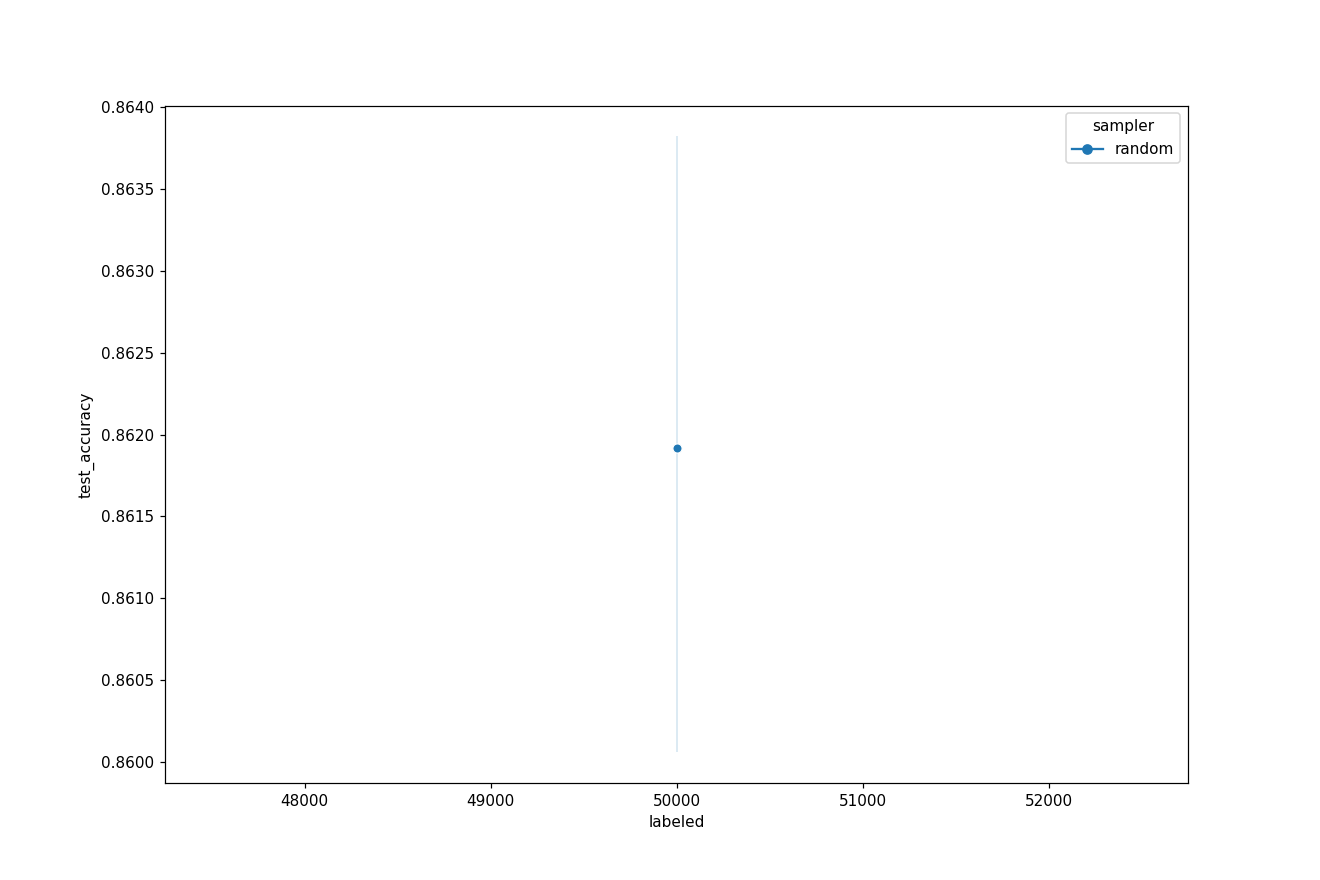

In [105]:
plot_al_accuracy(df_tr, ci=90)

<IPython.core.display.Javascript object>


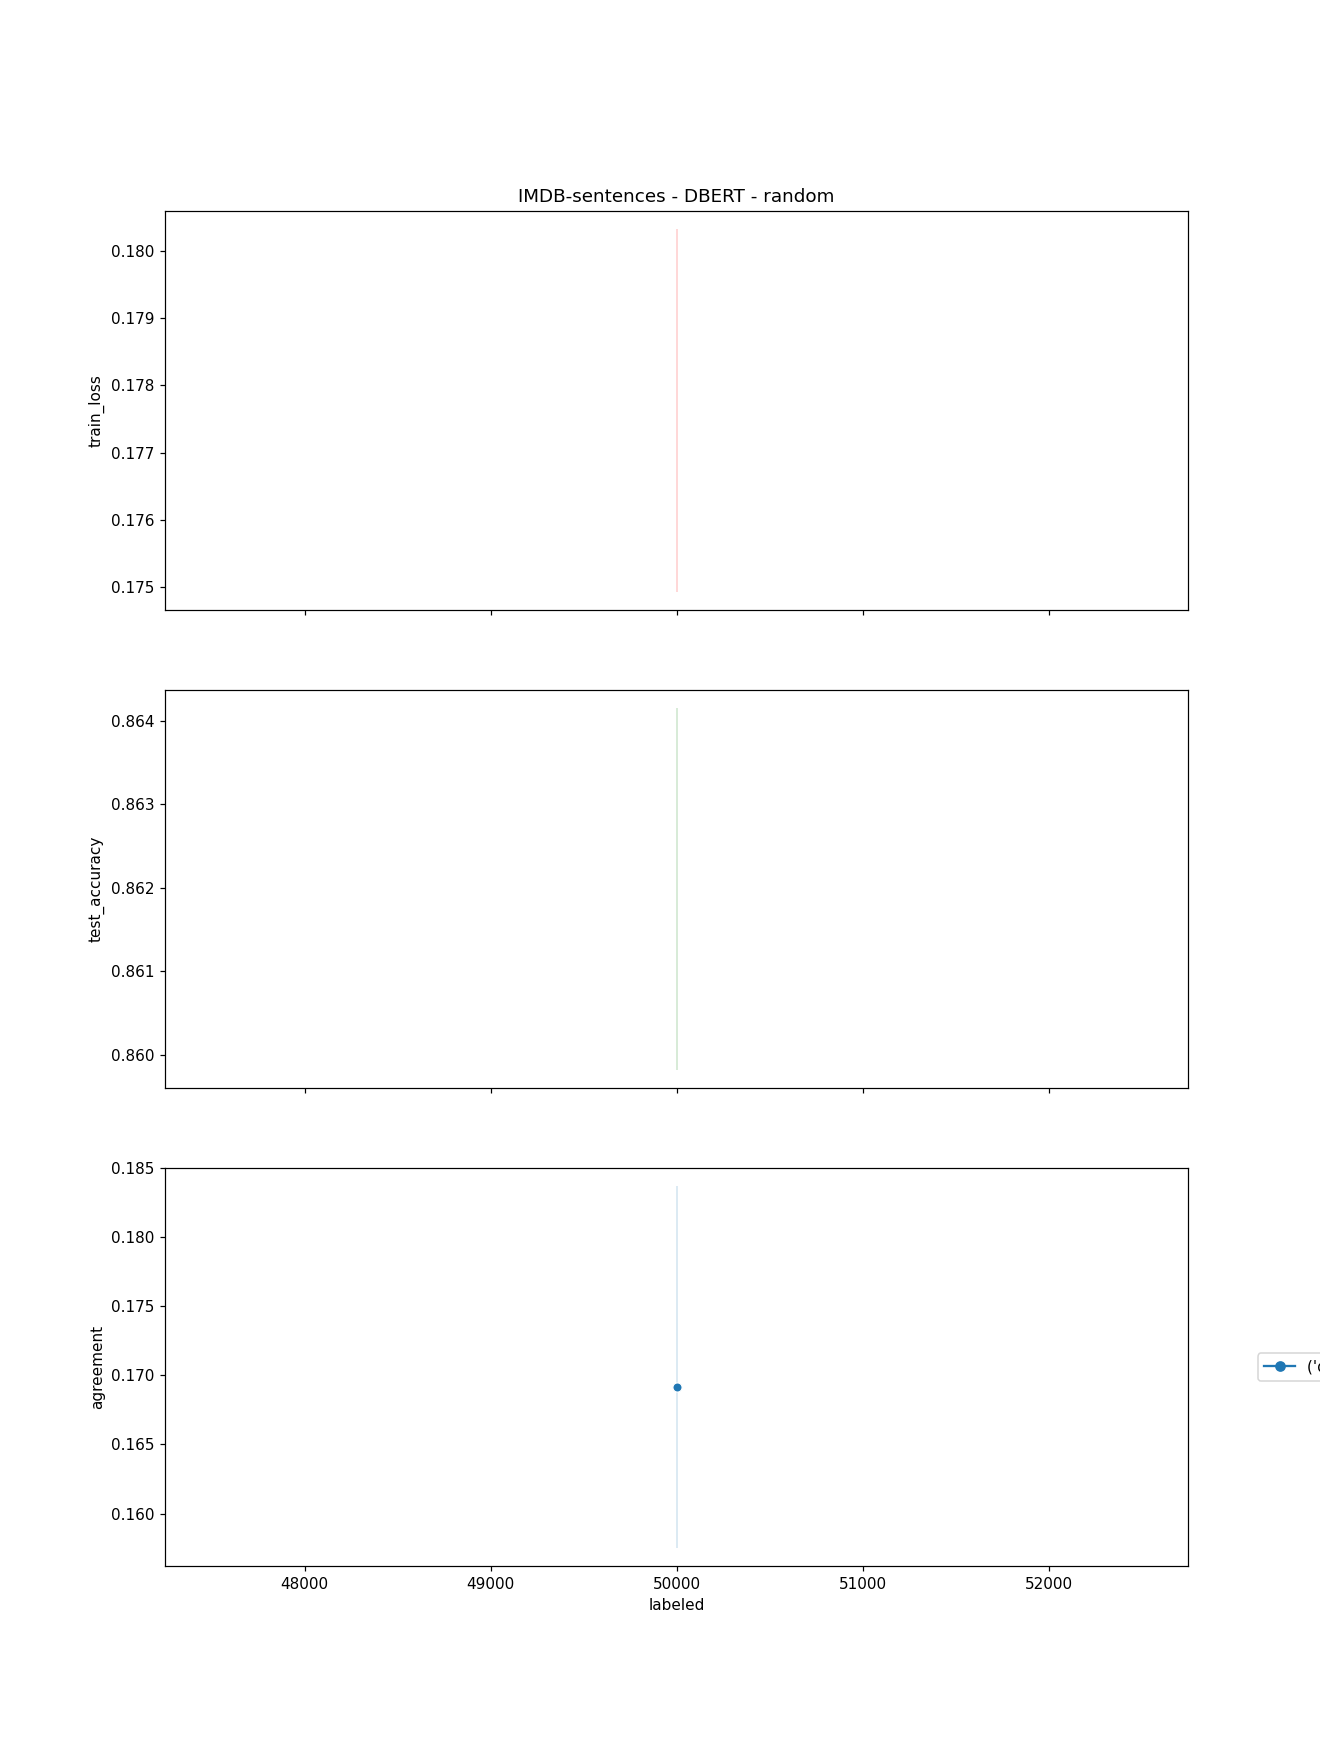

In [106]:
plot_experiment_set(df_tr, df_agr, meta, "random")

In [41]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [42]:
def df_average(df, groupby=["al_iter", "sampler"]):
    new_df = df.groupby(groupby).aggregate('mean')
    new_df.labeled = new_df.labeled.astype(int)
    return new_df

In [31]:
df_avg

labeled  train_loss  test_accuracy
al_iter sampler                                    
0       entropy       50    0.656629       0.527389
        random        50    0.656629       0.527389
1       entropy     1050    0.199001       0.774284
        random      1050    0.226029       0.718038
2       entropy     2050    0.130148       0.808114
        random      2050    0.115017       0.751455
3       entropy     3050    0.080189       0.818474
        random      3050    0.106756       0.839927
4       entropy     4050    0.054944       0.842494
        random      4050    0.078755       0.832317
5       entropy     5050    0.060063       0.840248
        random      5050    0.045781       0.837543
6       entropy     6050    0.052225       0.849003
        random      6050    0.048844       0.844281
7       entropy     7050    0.039704       0.842127
        random      7050    0.046072       0.845061
8       entropy     8050    0.037562       0.844006
        random      8050    0.037864       0.840110
9       entropy     9050    0.029376       0.833096
        random      9050    0.031760       0.849278
10      entropy    10050    0.028879       0.843090
        random     10050    0.034435       0.855787

In [14]:
df_tr

labeled  train_loss  test_accuracy  sampler
experiment al_iter                                             
0          0             50    0.672345       0.498739  entropy
           1           1050    0.176514       0.757965  entropy
           2           2050    0.222881       0.797387  entropy
           3           3050    0.091616       0.755444  entropy
           4           4050    0.098119       0.836580  entropy
...                     ...         ...            ...      ...
4          6           6050    0.051663       0.851708   random
           7           7050    0.032887       0.848040   random
           8           8050    0.040243       0.835205   random
           9           9050    0.021466       0.836122   random
           10         10050    0.021430       0.844144   random

[110 rows x 4 columns]

In [13]:
df_avg

labeled  train_loss  test_accuracy
al_iter sampler                                    
0       entropy     50.0    0.656629       0.527389
        random      50.0    0.656629       0.527389
1       entropy   1050.0    0.199001       0.774284
        random    1050.0    0.226029       0.718038
2       entropy   2050.0    0.130148       0.808114
        random    2050.0    0.115017       0.751455
3       entropy   3050.0    0.080189       0.818474
        random    3050.0    0.106756       0.839927
4       entropy   4050.0    0.054944       0.842494
        random    4050.0    0.078755       0.832317
5       entropy   5050.0    0.060063       0.840248
        random    5050.0    0.045781       0.837543
6       entropy   6050.0    0.052225       0.849003
        random    6050.0    0.048844       0.844281
7       entropy   7050.0    0.039704       0.842127
        random    7050.0    0.046072       0.845061
8       entropy   8050.0    0.037562       0.844006
        random    8050.0    0.037864       0.840110
9       entropy   9050.0    0.029376       0.833096
        random    9050.0    0.031760       0.849278
10      entropy  10050.0    0.028879       0.843090
        random   10050.0    0.034435       0.855787

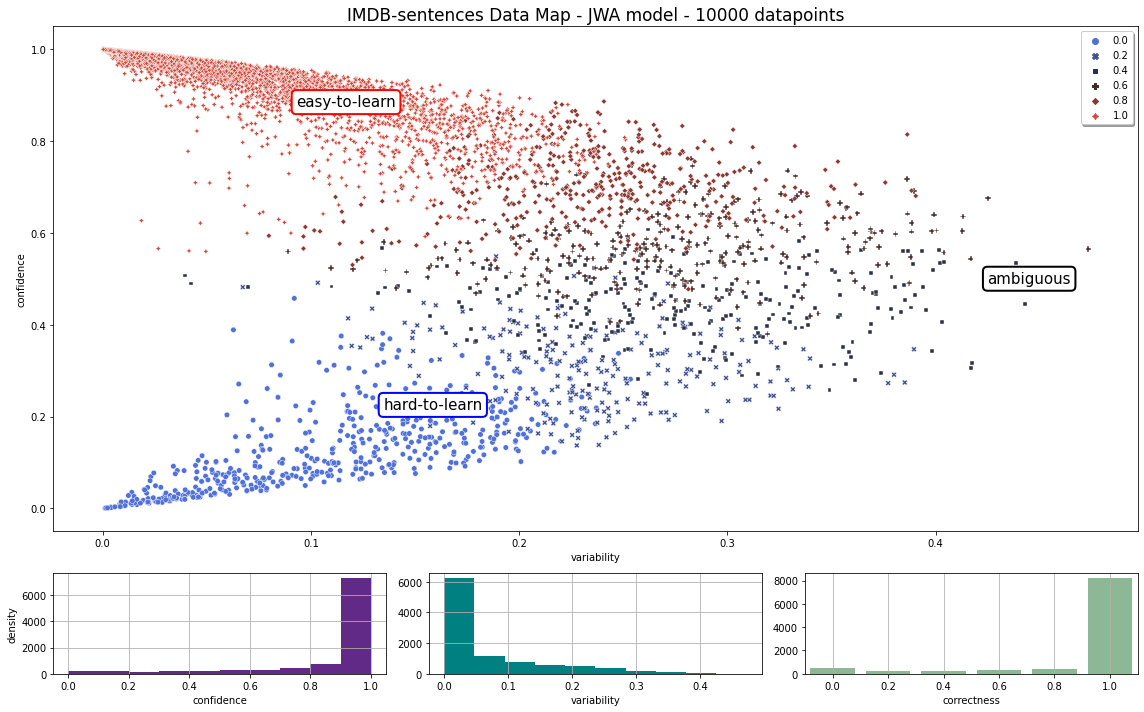

In [44]:
from IPython.display import display, clear_output
import time

df = df_crt_test
sampler = "random"
animate = lambda i: plot_cartography(df, "random", i, meta, hue_metric="correct")

for i in range(len(df[df.index.get_level_values("sampler") == sampler])):
    fig = animate(i)
    clear_output(wait=True)
    display(fig)
    time.sleep(1)
    
clear_output(wait=True)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

%matplotlib notebook

fig = plt.figure(figsize=(10, 6))


def animate(i):
    df = convert_cartography_df(df_crt_test, "random", frame)
    df = df.assign(corr_frac=lambda d: d.correctness / d.correctness.max())
    df = df.sort_values("corr_frac")
    df["correct"] = [f"{x:.1f}" for x in df["corr_frac"]]
    pal = sns.diverging_palette(
        260, 15, n=meta["epochs_per_train"] + 1, sep=10, center="dark"
    )
    graph = sns.scatterplot(
        x="variability",
        y="confidence",
        data=df,
        ax=ax0,
        hue="correct",
        palette=pal,
        style="correct",
        s=30,
    )
    plt.setp(graph.scatter)


ani = animation.FuncAnimation(
    fig, animate, frames=len(df_crt_test.index), interval=700, repeat=True
)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10))
s = ax.scatter([],[])
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 1)


def animate(i):
    df = convert_cartography_df(df_crt_test, "random", i)
    df = df.assign(corr_frac=lambda d: d.correctness / d.correctness.max())
    df = df.sort_values("corr_frac")
    df["correct"] = [f"{x:.1f}" for x in df["corr_frac"]]
    data = np.stack([df["variability"], df["confidence"]]).T
    s.set_offsets(data)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(df_crt_test), interval=1000)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
def plot_last_epoch(experiment, interpret_pairs):
    agreement_dict = defaultdict(list)
    train_scores = []
    eval_scores = []
    for (al_epoch, (L, A, T, E)) in enumerate(
        zip(
            experiment["labeled"],
            experiment["agreement"],
            experiment["train"],
            experiment["eval"],
        ),
        1,
    ):
        for ip in interpret_pairs:
            agreement_dict[ip].append(list(A)[-1][ip])
        train_scores.append(list(T)[-1]["loss"])
        eval_scores.append(list(E)[-1]["accuracy"] / 100)

    fig, axs = plt.subplots(3, figsize=(12, 10), sharex=True)
    axs[0].scatter(experiment["labeled"], train_scores, color="r")
    axs[0].plot(experiment["labeled"], train_scores, color="r")
    axs[0].set_ylabel("Loss")
    axs[1].scatter(experiment["labeled"], eval_scores, color="g")
    axs[1].plot(experiment["labeled"], eval_scores, color="g")
    axs[1].set_ylabel("Accuracy")
    for ip, agrs in agreement_dict.items():
        axs[2].scatter(experiment["labeled"], agrs)
        axs[2].plot(experiment["labeled"], agrs)

    axs[2].set_ylabel("Agreement")
    axs[2].set_xlabel("# labeled")
    axs[2].legend(interpret_pairs)


def plot_al_agreement(experiment_sets, meta, figsize=(12, 8), ci=90):
    fig, axs = plt.subplots(len(meta["interpret_pairs"]), figsize=figsize)
    if type(axs) is not list:
        axs = [axs]
    for ip, ax in zip(meta["interpret_pairs"], axs):
        dfs = []
        for exp_set, sampler in zip(experiment_sets, samplers):
            _, df_agr, _ = extract_last_epoch(exp_set, meta["interpret_pairs"])
            df_new = df_agr[df_agr.index.get_level_values("interpreter") == ip].copy()
            df_new["sampler"] = sampler
            dfs.append(df_new)

        agr_data = pd.concat(dfs)
        sns.lineplot(
            ax=ax,
            data=agr_data,
            x="labeled",
            y="agreement",
            hue="sampler",
            style="sampler",
            markers=True,
            dashes=False,
            picker=1,
            ci=ci,
        )
        ax.set_title(ip)


def plot_epochwise_trend(results, interpreter):
    agreements = []
    for (al_epoch, (L, A, T, E)) in enumerate(
        zip(
            results["labeled"], results["agreement"], results["train"], results["eval"]
        ),
        1,
    ):

        for a in A:
            agreement = a[interpreter]
            if np.isnan(agreement):
                agreement = 0
            agreements.append(agreement)

    plt.figure(figsize=(20, 8))
    plt.scatter(range(len(agreements)), agreements)
    plt.plot(range(len(agreements)), agreements)
    plt.vlines(
        range(len(A), len(results["labeled"]) * len(A), len(A)),
        ymin=-0.2,
        ymax=1,
        color="r",
    )
    plt.ylabel("Agreeement")
    plt.title(interpreter)

In [47]:
df_sub = dftest.iloc[200:]

In [48]:
i = 5
df_sub.iloc[i].text, df_sub.iloc[i].label,

('this movie has all the potential of becoming a cult movie', 'positive')

In [49]:
for i, val in df_sub.iterrows():
    print(f"{val.text}, [{val.label}]")
    print("-"*100)

and the lengthy black mass finale with the witches accompanied by the respective child they will be taking over all dressed in red except for a black clad martin presiding over the ceremony which culminates in ritual mass suicide, [positive]
----------------------------------------------------------------------------------------------------
it is a movie that you can sit down with your family and watch though we would have to cover the kids eyes a few times due to the discretionary love scenes, [positive]
----------------------------------------------------------------------------------------------------
i really liked this movie, [positive]
----------------------------------------------------------------------------------------------------
all in all this was a great film that you can watch again and again whenever you need reminding that the world is n't a horrible place after all, [positive]
--------------------------------------------------------------------------------------------

In [50]:
df_sub

,text,tokens,label,type,deeplift,grad-shap,int-grad
example,,,,,,,
6038,and the lengthy black mass finale with the wit...,"['and', 'the', 'lengthy', 'black', 'mass', 'fi...",positive,ambiguous,[0.1828853 0.0521843 0.07311775 0.6797614 0...,[0.4538986 0.13106844 0.73105985 0.9771897 0...,[0.41839206 0.10959165 0.59283733 0.98409186 0...
705,it is a movie that you can sit down with your ...,"['it', 'is', 'a', 'movie', 'that', 'you', 'can...",positive,ambiguous,[1.27174988e-01 1.53766915e-01 5.48934996e-01 ...,[0.05246435 0.04085771 0.18823195 0.15319313 0...,[0.03554374 0.02677603 0.21675743 0.15937756 0...
6970,i really liked this movie,"['i', 'really', 'liked', 'this', 'movie', '[PA...",positive,ambiguous,[0.23607676 0.05324061 0.05975749 0.46943074 0...,[0.27663437 0.10566517 0.11547869 0.47448364 0...,[0.25631868 0.09860771 0.09763608 0.43729889 0...
9069,all in all this was a great film that you can ...,"['all', 'in', 'all', 'this', 'was', 'a', 'grea...",positive,ambiguous,[0.12720741 1.0895635 0.04990727 0.09369813 1...,[0.06820954 0.50914776 0.2685381 0.38108912 1...,[0.11449598 0.60978927 0.21650482 0.36789392 1...
5061,nicholas stoller write the movie yes man but d...,"['nicholas', 'stoller', 'write', 'the', 'movie...",negative,ambiguous,[0.4957214 0.21785691 0.11245587 0.953636 0...,[1.0588691 0.35814434 0.29290888 1.2735608 0...,[0.93466553 0.34650802 0.25636493 1.23514938 0...
...,...,...,...,...,...,...,...
2490,if you are into something completely different...,"['if', 'you', 'are', 'into', 'something', 'com...",positive,ambiguous,[0.0442624 0.0595956 0.08346486 0.35220075 2...,[0.22611108 0.08676077 0.41410875 0.3862187 1...,[0.23875589 0.09589447 0.42240145 0.38479664 1...
6515,i m sorry i bought the movie,"['i', 'm', 'sorry', 'i', 'bought', 'the', 'mov...",negative,ambiguous,[9.3379579e-02 3.2206256e-02 1.8041052e-02 4.4...,[0.12605989 0.01839368 0.0210083 0.01273989 0...,[0.12903862 0.01200776 0.02201899 0.00991548 0...
5303,his movies are not discussed well,"['his', 'movies', 'are', 'not', 'discussed', '...",negative,ambiguous,[0.1069613 0.9509966 2.8677158 0.13013688 0...,[0.2985378 0.58748066 2.0774865 0.25942978 0...,[0.24561888 0.67777157 2.42713101 0.16161105 0...


In [84]:
df_sub.iloc[10].text

'ah how refreshing to see a vision of 18th century england complete with mud the pox and gibbets and accompanied by a delightful techno soundtrack to boot'